In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as DT
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

## Reading the data


In [7]:
my_sheet_name = 'Sheet1' 
df = pd.read_excel('Case Data - Loan Applications.xlsx', sheet_name = my_sheet_name)


# Printing the Features


In [8]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [9]:
type_features(df)

categorical_features : Index(['application_date', 'city', 'companyName', 'companyType', 'gender',
       'mr_mrs_smt', 'occupation', 'officeCity', 'residenceType', 'state',
       'status'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['No.', 'approved', 'dob', 'bank_statements_uploaded',
       'documents_uploaded', 'adhar_uploaded', 'interest', 'interest_rate',
       'net_income', 'noOfYearInCurrentEmployment', 'officePostalCode',
       'pan_card_uploaded', 'phone_verified', 'photo_uploaded', 'totalWorkEx'],
      dtype='object')


In [10]:
df.head()

,No.,application_date,approved,city,companyName,companyType,dob,gender,bank_statements_uploaded,documents_uploaded,...,occupation,officeCity,officePostalCode,pan_card_uploaded,phone_verified,photo_uploaded,residenceType,state,status,totalWorkEx
0,0,2018-08-02 11:01:28,0.0,Chennai,VPN System Services,Proprietorship,1986-06-05,Male,True,True,...,Self-employed business,Chennai,600007.0,True,False,True,Owned,Tamil Nadu,application_rejected,9.0
1,1,2018-08-02 10:48:57,NaN,Bengaluru,united breweries ltd,Limited,1979-08-23,Male,True,True,...,Salaried,Bengaluru,562123.0,True,False,True,Rented,Karnataka,documents_verification_pending,16.0
2,2,2018-08-02 10:42:46,NaN,Hyderabad,Pyramid Softsol Pvt Ltd,Private Limited,1991-02-13,Male,True,True,...,Salaried,Hyderabad,500081.0,True,False,True,Parental,Telangana,documents_verification_pending,6.0
3,3,2018-08-02 10:24:14,0.0,Karimnagar,tstransco,Limited,1986-05-30,Male,True,True,...,Self-employed Professional,Karimnagar,505001.0,True,False,True,Owned,Telangana,application_rejected,10.0
4,4,2018-08-02 10:13:58,0.0,Namakkal,A.R.DAIRY FOODS PRIVATE LIMITED,Limited,1987-04-12,Male,True,True,...,Salaried,Palani,624002.0,True,False,True,Parental,Tamil Nadu,application_rejected,11.0


In [11]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

## Handling missing values

In [12]:
#Forming a DF of the 2 quantities identified earlier.
ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#only non zero values
ms= ms[ms["Percent"] > 0]
f,ax =plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5,1,'Percent missing data by feature')

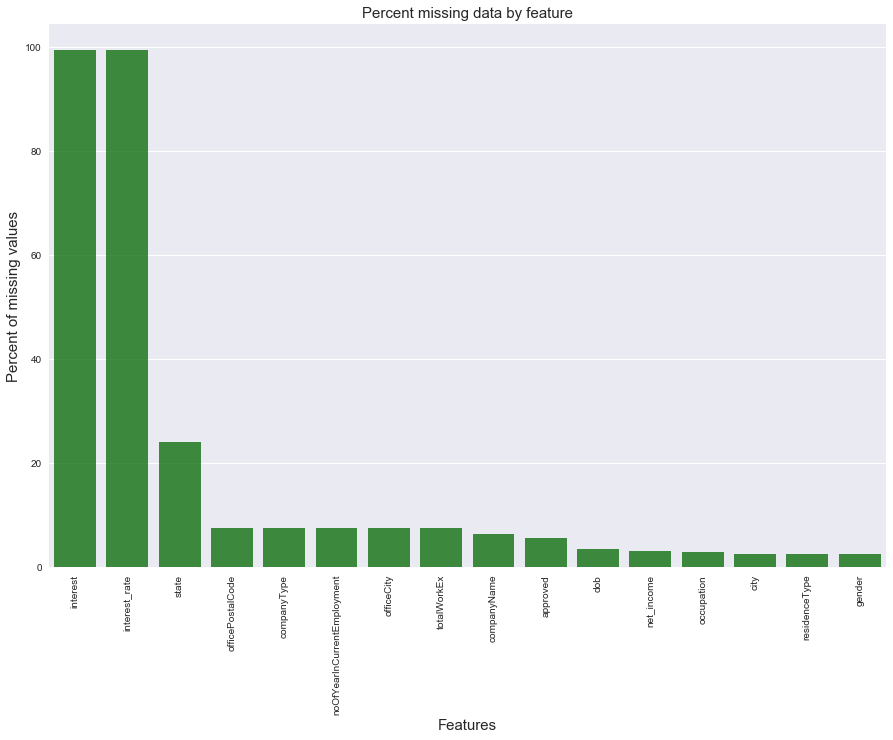

In [13]:
plt.show()

####  Seems the columns 'interest', 'interest_rate' are all empty/ not provided, as such, these columns can't be utilized in the analytics and will be dropped

In [14]:
df=df.drop(['interest', 'interest_rate'], axis=1)

In [15]:
type_features(df)

categorical_features : Index(['application_date', 'city', 'companyName', 'companyType', 'gender',
       'mr_mrs_smt', 'occupation', 'officeCity', 'residenceType', 'state',
       'status'],
      dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['No.', 'approved', 'dob', 'bank_statements_uploaded',
       'documents_uploaded', 'adhar_uploaded', 'net_income',
       'noOfYearInCurrentEmployment', 'officePostalCode', 'pan_card_uploaded',
       'phone_verified', 'photo_uploaded', 'totalWorkEx'],
      dtype='object')


#### NOTE: 
To handle the missing values, certain features, such as officePostalCode,companyName etc. are replaced with N/A, certain numerical features such as noOfYearInCurrentEmployment are given a static value of 99, which I have considered as unspecified. The feature net_income occupies a large range of values, and this feature also has a very small % of missing value, these factors contribute towards my decision to replace the missing values with the Arithmetic Mean of the rest of the column. The same factors also contribute to say that this replacement doesnt greatly effect the statistical properties of the column.
Also, for the feature approved, I have assumed there is no intermediary approval state such as 'pending' or 'partially approved. I have assumed the same to be binary as False or True.

In [16]:
values = {'officePostalCode' : 'N/A', 'companyName': 'N/A' , 'noOfYearInCurrentEmployment': 99, 'officeCity': 'N/A', 'totalWorkEx': 99 , 'companyName':'N/A', 'approved': 1 ,'dob':99,'occupation':'N/A','city':'N/A','state': 'N/A','companyType':'N/A','residenceType':'N/A','gender':'N/A'}

In [17]:
df=df.fillna(value=values)

In [18]:
df['net_income'].fillna((df['net_income'].mean()), inplace=True)

In [19]:
df.head()

,No.,application_date,approved,city,companyName,companyType,dob,gender,bank_statements_uploaded,documents_uploaded,...,occupation,officeCity,officePostalCode,pan_card_uploaded,phone_verified,photo_uploaded,residenceType,state,status,totalWorkEx
0,0,2018-08-02 11:01:28,0.0,Chennai,VPN System Services,Proprietorship,1986-06-05,Male,True,True,...,Self-employed business,Chennai,600007,True,False,True,Owned,Tamil Nadu,application_rejected,9.0
1,1,2018-08-02 10:48:57,1.0,Bengaluru,united breweries ltd,Limited,1979-08-23,Male,True,True,...,Salaried,Bengaluru,562123,True,False,True,Rented,Karnataka,documents_verification_pending,16.0
2,2,2018-08-02 10:42:46,1.0,Hyderabad,Pyramid Softsol Pvt Ltd,Private Limited,1991-02-13,Male,True,True,...,Salaried,Hyderabad,500081,True,False,True,Parental,Telangana,documents_verification_pending,6.0
3,3,2018-08-02 10:24:14,0.0,Karimnagar,tstransco,Limited,1986-05-30,Male,True,True,...,Self-employed Professional,Karimnagar,505001,True,False,True,Owned,Telangana,application_rejected,10.0
4,4,2018-08-02 10:13:58,0.0,Namakkal,A.R.DAIRY FOODS PRIVATE LIMITED,Limited,1987-04-12,Male,True,True,...,Salaried,Palani,624002,True,False,True,Parental,Tamil Nadu,application_rejected,11.0


In [20]:
df.isnull().values.any()

False

#### There are no more missing values in the dataset

#### Obtaining the attribute 'Age'

In [21]:
now = pd.Timestamp(DT.datetime.now())
df['dob'] = pd.to_datetime(df['dob'], format='%m%d%y')    # 1
df['dob'] = df['dob'].where(df['dob'] < now, df['dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['dob']).astype('<m8[Y]')    # 3

In [22]:
df.head()

,No.,application_date,approved,city,companyName,companyType,dob,gender,bank_statements_uploaded,documents_uploaded,...,officeCity,officePostalCode,pan_card_uploaded,phone_verified,photo_uploaded,residenceType,state,status,totalWorkEx,age
0,0,2018-08-02 11:01:28,0.0,Chennai,VPN System Services,Proprietorship,1986-06-05,Male,True,True,...,Chennai,600007,True,False,True,Owned,Tamil Nadu,application_rejected,9.0,32.0
1,1,2018-08-02 10:48:57,1.0,Bengaluru,united breweries ltd,Limited,1979-08-23,Male,True,True,...,Bengaluru,562123,True,False,True,Rented,Karnataka,documents_verification_pending,16.0,38.0
2,2,2018-08-02 10:42:46,1.0,Hyderabad,Pyramid Softsol Pvt Ltd,Private Limited,1991-02-13,Male,True,True,...,Hyderabad,500081,True,False,True,Parental,Telangana,documents_verification_pending,6.0,27.0
3,3,2018-08-02 10:24:14,0.0,Karimnagar,tstransco,Limited,1986-05-30,Male,True,True,...,Karimnagar,505001,True,False,True,Owned,Telangana,application_rejected,10.0,32.0
4,4,2018-08-02 10:13:58,0.0,Namakkal,A.R.DAIRY FOODS PRIVATE LIMITED,Limited,1987-04-12,Male,True,True,...,Palani,624002,True,False,True,Parental,Tamil Nadu,application_rejected,11.0,31.0


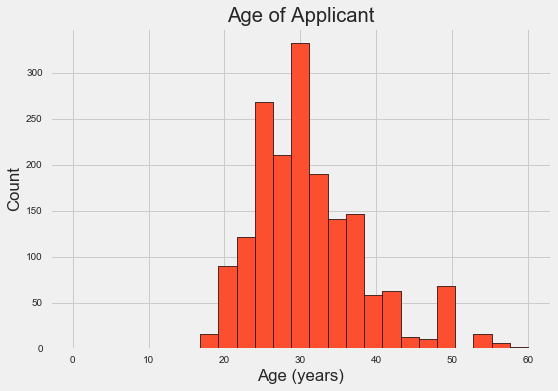

In [139]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df['age'], edgecolor = 'k', bins = 25)
plt.title('Age of Applicant'); plt.xlabel('Age (years)'); plt.ylabel('Count')
plt.show()

### Most of the loan applicants fall in the age group mid 20's to early 30's
This could possibly be explained by the fact that this age group is very likely to require loans for various purchases like Car, House, higher education, for personaly ameneties, to pay for a wedding, etc.

In [136]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were not approved
sns.kdeplot(df.loc[df['approved'] == 0, 'age'] , label = 'Not Approved')

# KDE plot of loans which were approved
sns.kdeplot(df.loc[df['approved'] == 1, 'age'] , label = 'Approved')

# Labeling of plot
plt.xlabel('age'); plt.ylabel('Density'); plt.title('Distribution of Ages');

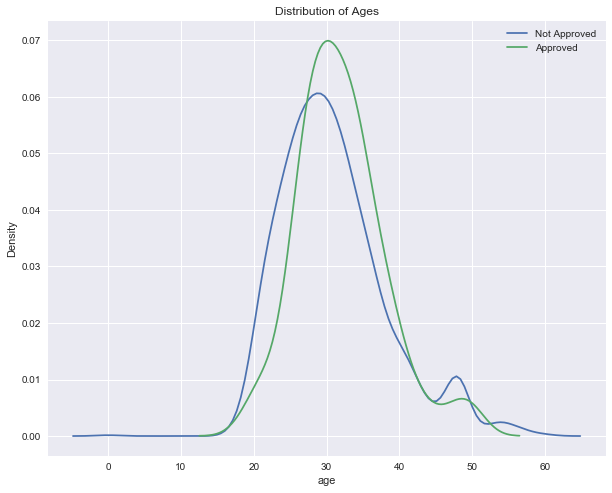

In [137]:
plt.show()

#### From the above KDE we can observe that the density for approved loans is slightly more.
People who are older, typically tend to have a better job security, better income due to experience and promotions and are less likely to default loans, making it easier to approve the loans, The younger generation of people are more risky.

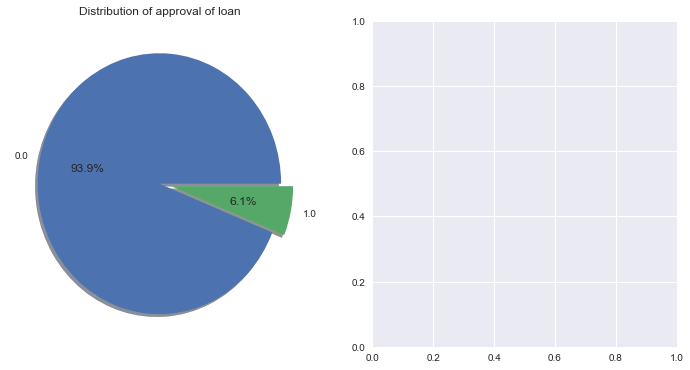

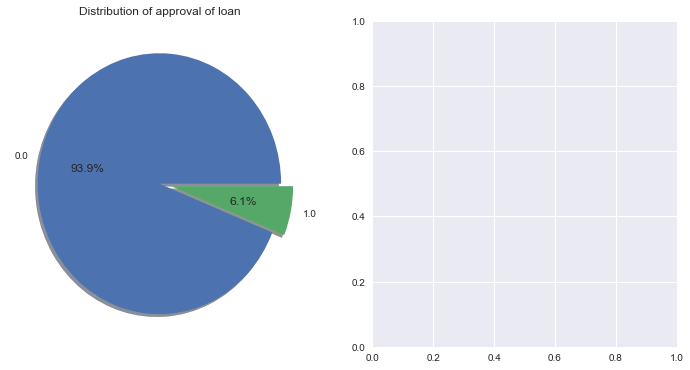

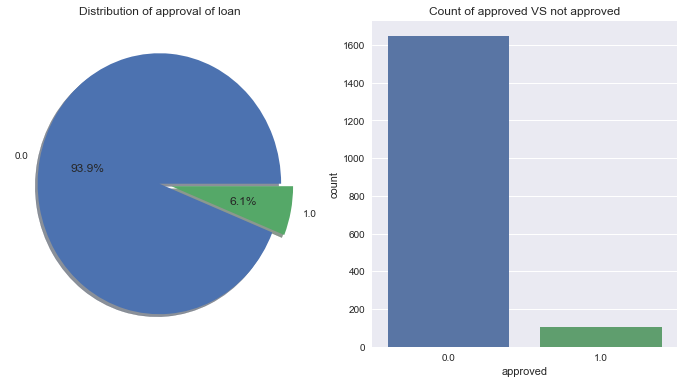

In [25]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df.approved.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of approval of loan')
ax[0].set_ylabel('')
sns.countplot('approved',data=df,ax=ax[1])
ax[1].set_title('Count of approved VS not approved')
plt.show()

In [30]:
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(10,6))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Green')
    ax[0].set_title('count of customer Based on '+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': approved vs not approved')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

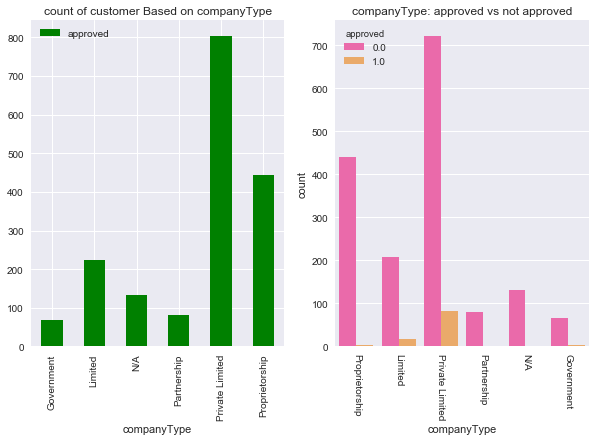

In [31]:
plot_re(df,'companyType','approved')

#### most of the applicants for the loan are from Private Limited companies, followed by Propreitership and Limited. The loans approved are for the Private, Limited and Propritership companies. 
Private companies are funded by individuals or parties, and they do require financial assistance from time to time, so it makes sense that Private Limited companies are the most common company type requesting for loans.
The same line of reasoning can be used to explain the high requirement for loans for Propreitorship and Limited companies, as these companies too, have individuals or families responsible for the financial management of companies. this also explains why Government companies are the ones that are least common in seeking loans, they are backed by the finance of the government and tax payers of the country/state/muncipality. 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


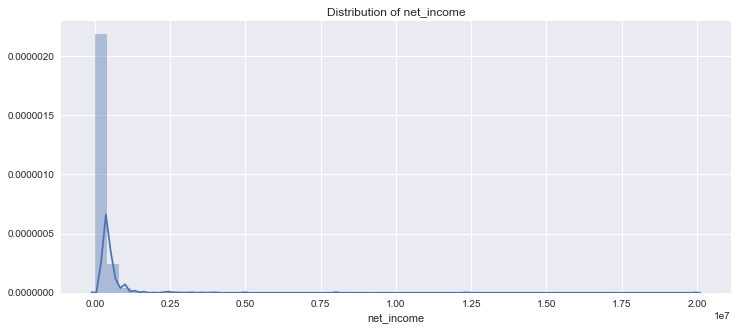

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of net_income")
ax = sns.distplot(df["net_income"])
plt.show()

#### majority of loan applicants have net_income ~ 0.05 x 1e7
This makes sense as people with salaries above Rs. 5,00,000 can fund themselves for most of the purposes of loans, people who are in the lesser income groups, require financial assistance more, as such the density for the lower income groups is higher.

In [38]:
temp = df["gender"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Genders of applicants",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

#### Most of the loan applicants are Male
This can be explained by the fact that a Male member of the family is typically responsible for running the household and is considered responsible for the finances, livelihood, luxury, education of offspring etc. atleast this has been the case in India, although lately women are also earning and supporting the households.
NOTE: here, N/A represents the missing values in the data. 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



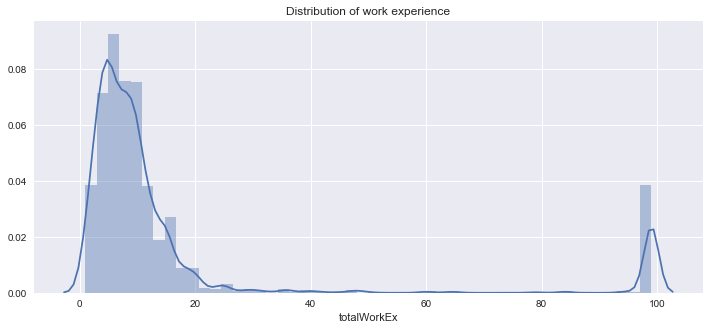

In [39]:
plt.figure(figsize=(12,5))
plt.title("Distribution of work experience")
ax = sns.distplot(df["totalWorkEx"])
plt.show()

#### a density plot displaying the total work experience of all applicants, most dense region in the graph is 1-20 year group, with a sharp peak at 5 years
NOTE: the small spike at 99 is to account for the missing values in the data, and should not be considered.

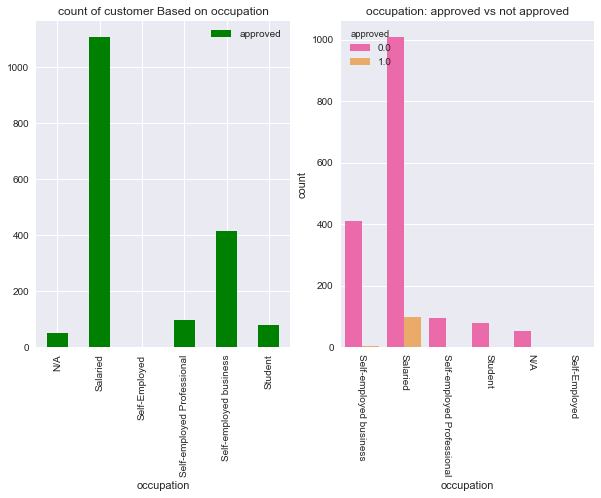

In [41]:
plot_re(df,'occupation','approved')

#### Most people who apply for loans are in the categories Salaried and Self-employed business and most of the approved loans are also for Salaried occupation
The vast majority of the population is belonging to the Salaried class, therefore, salaried class people are also more likely to request for loans. Self employed business is the second most popular type of occupation among loan takers as it they need to sustain their business, to pay the bills, and to pay the employers if any. Also the least likely to take loans are students, as their main purpose for taking loans is for education purposes and they are not focussed on other things like credit loans, house loans, car loans, etc.

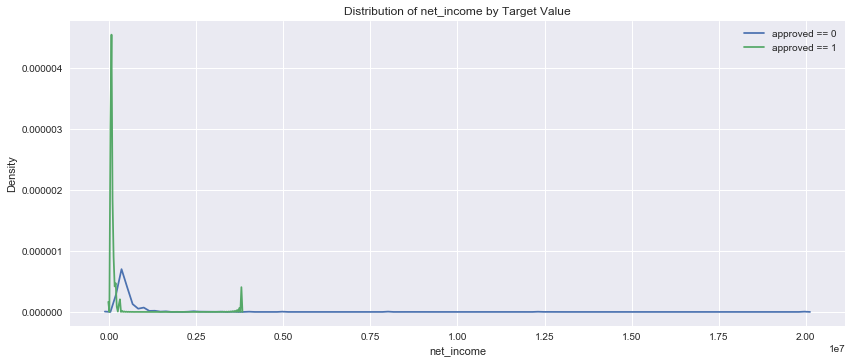

In [44]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['net_income']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['approved'] == 0, feature], label = 'approved == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['approved'] == 1, feature], label = 'approved == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
plt.show()

#### approved loans are majorly for the lower income people, as shown from the graph above. 

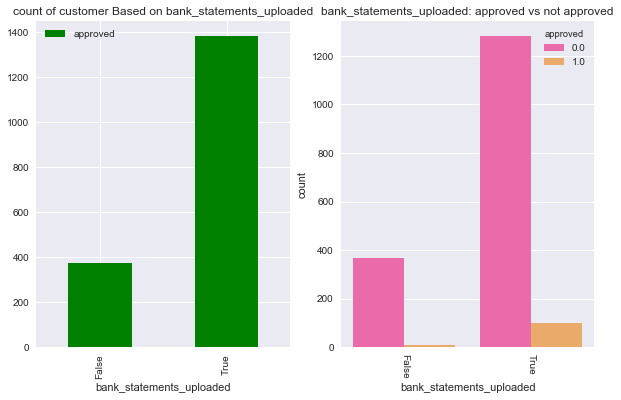

In [45]:
plot_re(df,'bank_statements_uploaded','approved')

#### a very small fraction of loans have been approved without bank statement being uploaded.

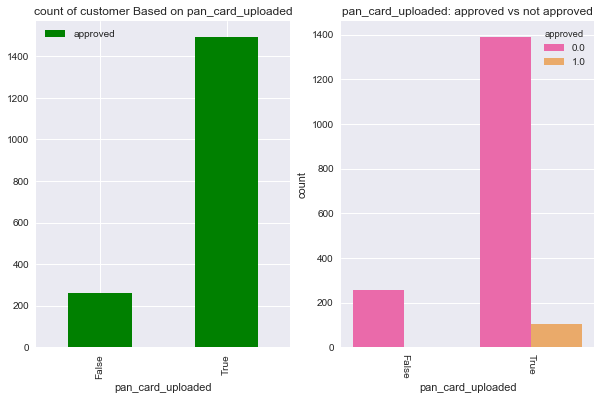

In [46]:
plot_re(df,'pan_card_uploaded','approved')

#### There are no approved loans for people who have no uploaded PAN Cards

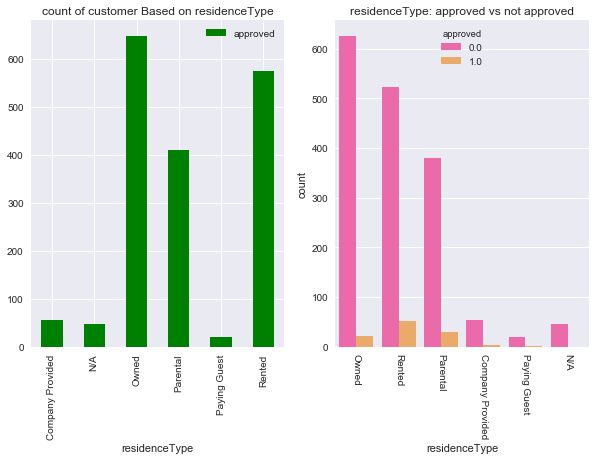

In [48]:
plot_re(df,'residenceType','approved')

#### Most of the loan applicants come from Owned, Rented and Parental residence types.
People who already own homes, may require loans for other needs like personal amenities, TV, Computer, AC, etc. Those living in rental homes also require loans for their real estate purchase or also for the same reasons as those living in own homes. People living in Company Homes and PG homes are less likely to purchase any of the personal amenities 